# Benchmark experiment (Figure 3)

In [1]:
#Import libraries
import os
import sys
import pickle
import pandas as pd
import numpy as np
from numpy import linspace
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.style as style
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix
import warnings

#import local modules
sys.path.append('../../vscreenml/') #Change this to point to the path where vscreenml is downloaded
from configuration import figures_config as cfg
from utilities import figureutilities
warnings.filterwarnings('ignore')
%matplotlib inline 

/Users/yusufadeshina/miniconda2/envs/rdkit_env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
target = 'Label'
IDcol = 'Name'

In [3]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [4]:
style.use('seaborn-white')
#style.available  (to see the styles available)

### Load Models

In [5]:
with open(cfg.VSCREENML+'/model/XGB_CLASSIFIER_alldata.pickle.dat', 'rb') as f:
    clf = pickle.load(f)
    
#retrained rfscore_v1
with open(cfg.VSCREENML+'/model/RFSCORE_V1_RETRAINED_WITH_OUR_DATA.pickle.dat', 'rb') as f:
    clf_rf = pickle.load(f)

### DEKOIS Benchmark

In [6]:
predictors_rf = [
    '6.6','7.6','8.6','16.6','6.7','7.7','8.7','16.7','6.8',
    '7.8','8.8','16.8','6.9','7.9','8.9','16.9','6.15','7.15',
    '8.15','16.15','6.16','7.16','8.16','16.16','6.17','7.17',
    '8.17','16.17','6.35','7.35','8.35','16.35','6.53','7.53',
    '8.53','16.53']

In [7]:
#proteins that are not present in D-COID
tag_no_train = ['11betaHSD1',
'17betaHSD1',
'A2A',
'ACE',
'ACE2',
'ADAM17',
'ADRB2',
'BCL2',
'COX1',
'CYP2A6',
'GBA',
'GR',
'HMGR',
'MMP2',
'PDE5',
'PNP',
'QPCT',
'ROCK-1',
'SARS-HCoV',
'TIE2',
'TK',
'TP',
'VEGFR1']

In [8]:
##Exclude target from both vScreenML and rfscorevs
tags_exclude = [
'17betaHSD1',
'ACE2',
'BCL2',
'CYP2A6',
'MMP2',
'QPCT',
'SARS-HCoV',
'TIE2',
'TP',
'VEGFR1']

In [9]:
#target from dekois that are also present in training set of rfscorevs
tags_overlap = ['11betaHSD1',
'A2A',
'ACE',
'ADAM17',
'ADRB2',
'ADRB2',
'COX1',
'GBA',
'GR',
'HMGR',
'PDE5',
'PNP',
'ROCK-1',
'TK']

In [10]:
#compute enrichment for DEKOIS set
enrich_dict ={}
for ifile in tag_no_train:
    compounds_list = pd.read_csv(cfg.PAPER_FIGURE_DIR+'/dekois/'+ifile+'_full_set_of_all_scoring_function.csv', encoding="utf-8-sig")
    scores = ['RFSCORE_V1_remade', 'nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
    enrich_dict[ifile],_ = figureutilities.predict_rank_and_enrichment(clf,clf_rf, compounds_list, predictors,predictors_rf, scores )

In [11]:
#convert enrichment dictionary to enrichment dataframe
enrich_df = pd.DataFrame.from_dict(enrich_dict,orient='index')

In [12]:
enrich_df

,RFSCORE_V1_remade,nnscore,rfscore_v1,rfscore_v3,rfscore_v2,PLEClinear_p5_l1_s65536,PLECnn_p5_l1_s65536,PLECrf_p5_l1_s65536,vina_affinity,rfscorevs,vScreenML,Interface_Energy
11betaHSD1,0.000000,2.868421,0.000000,2.868421,0.000000,0.000000,0.000000,0.000000,2.868421,0.000000,8.605263,0.000000
17betaHSD1,2.708625,2.708625,0.000000,0.000000,0.000000,0.000000,2.708625,0.000000,0.000000,2.708625,5.417249,0.000000
A2A,7.717949,0.000000,0.000000,5.145299,5.145299,7.717949,2.572650,5.145299,0.000000,15.435897,7.717949,0.000000
ACE,0.000000,13.363636,0.000000,0.000000,5.345455,0.000000,2.672727,0.000000,10.690909,2.672727,21.381818,2.672727
ACE2,0.000000,2.693182,10.772727,13.465909,5.386364,0.000000,0.000000,0.000000,5.386364,0.000000,8.079545,8.079545
ADAM17,0.000000,0.000000,2.718182,2.718182,0.000000,0.000000,2.718182,2.718182,8.154545,13.590909,2.718182,5.436364
ADRB2,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,2.500000,0.000000,0.000000,0.000000
BCL2,0.000000,0.000000,13.857809,19.400932,16.629371,2.771562,2.771562,2.771562,8.314685,5.543124,5.543124,2.771562
COX1,0.000000,2.706818,0.000000,0.000000,0.000000,0.000000,8.120455,0.000000,2.706818,18.947727,10.827273,0.000000
CYP2A6,0.000000,2.710526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
columns = ['RFSCORE_V1_remade', 
           'PLEClinear_p5_l1_s65536',
           'PLECnn_p5_l1_s65536',
           'PLECrf_p5_l1_s65536',
           'nnscore',
           'rfscore_v1',
           'rfscore_v2',
           'rfscore_v3',
           'rfscorevs',
           'Interface_Energy']# Interface_Energy, 'Rosetta']

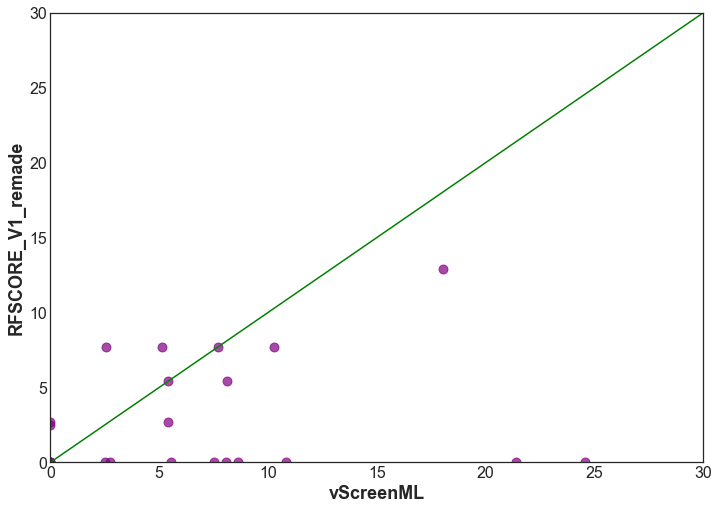

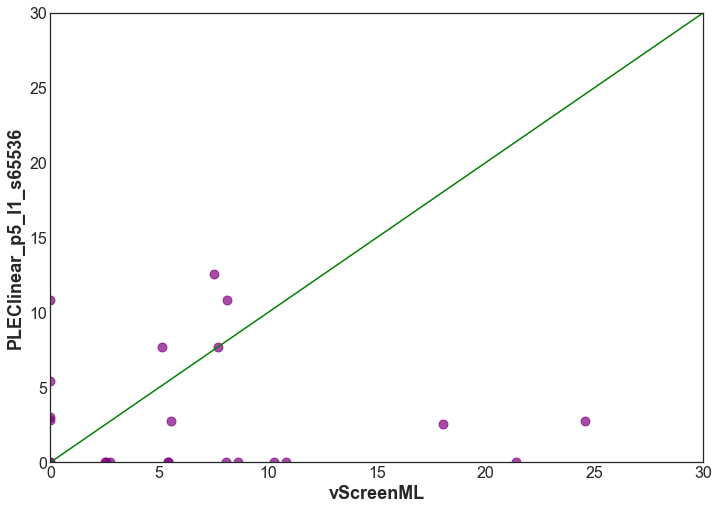

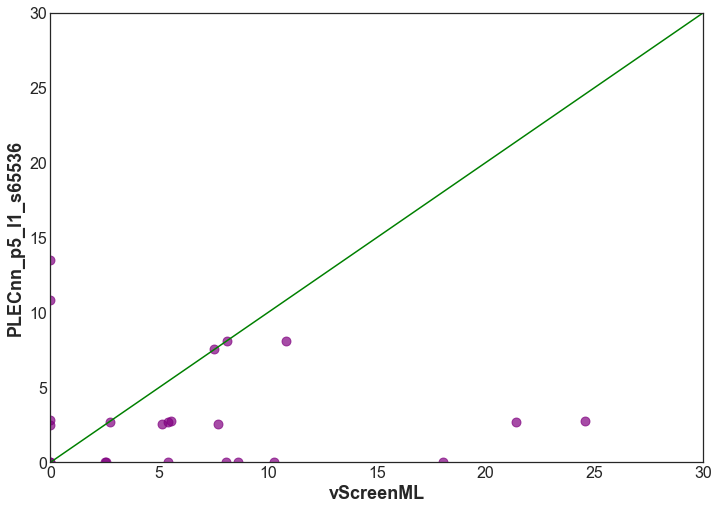

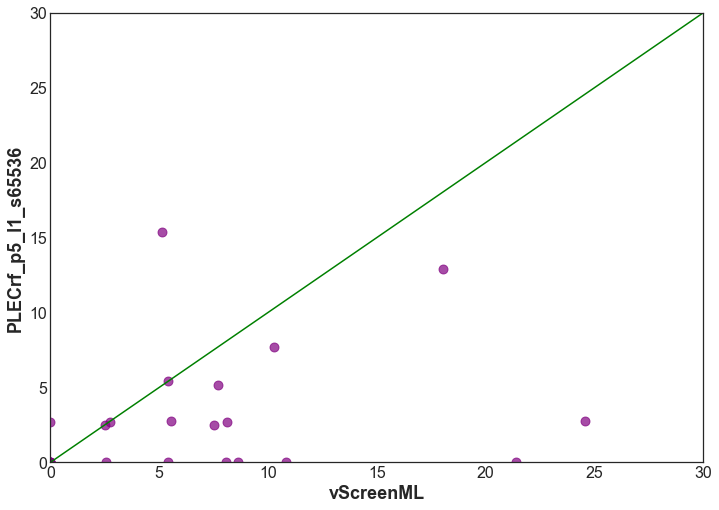

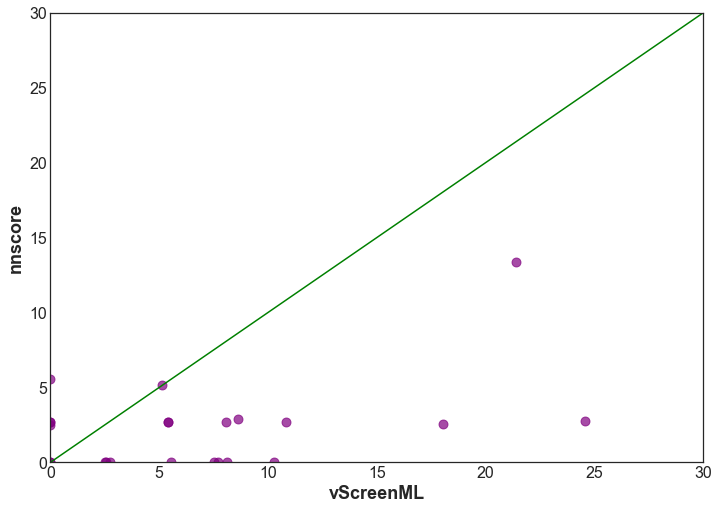

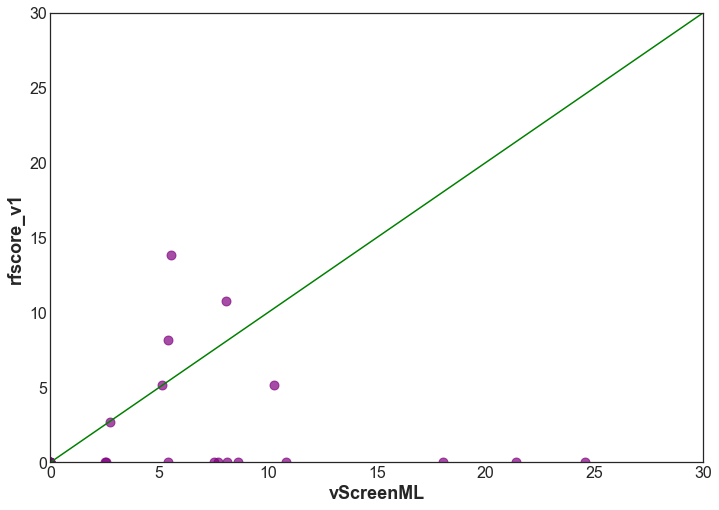

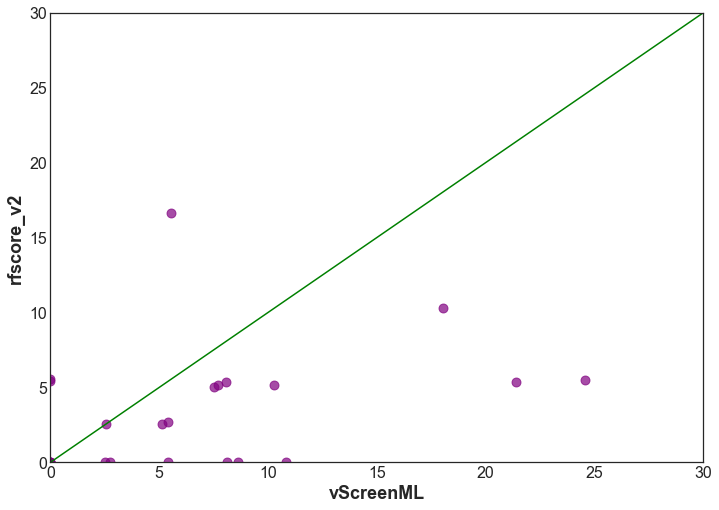

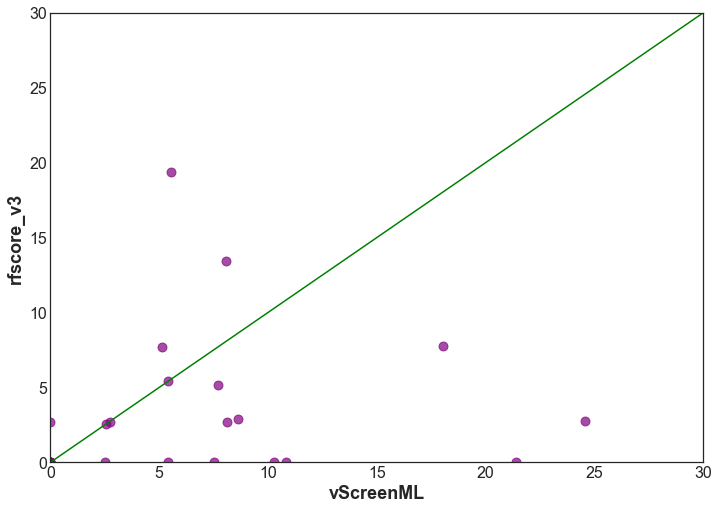

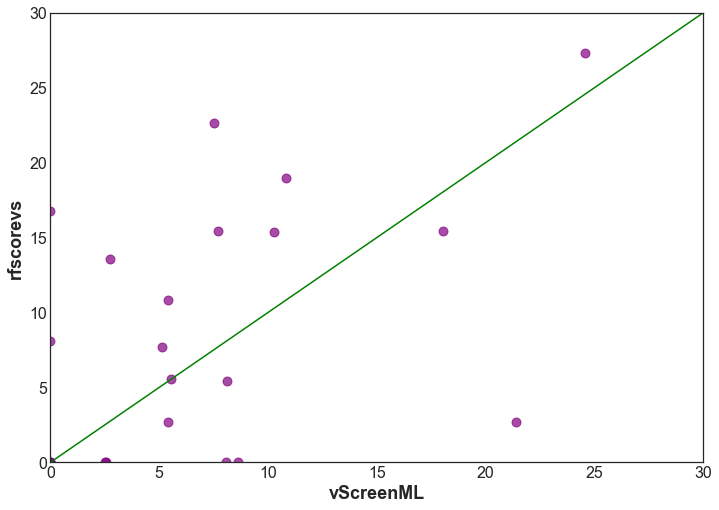

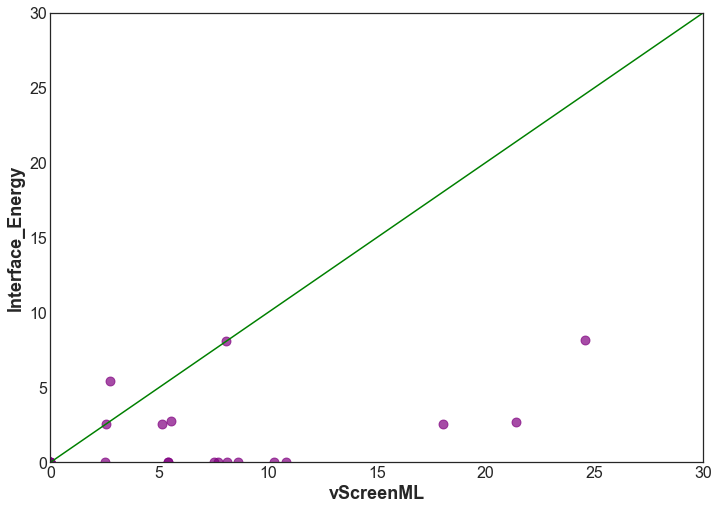

In [14]:
#plot enrichment
for column in columns:
    figureutilities.plot_benchmark_graph_dekois(enrich_df, 'vScreenML',column)

In [15]:
# wilcoxon signed ranked test
columns = [
    'nnscore', 
    'rfscore_v1', 
    'rfscore_v2', 
    'rfscore_v3', 
    'PLEClinear_p5_l1_s65536', 
    'PLECnn_p5_l1_s65536', 
    'PLECrf_p5_l1_s65536', 
    'Interface_Energy',
    'rfscorevs']

seen = []
for i in columns:
            print ('|||||||||||||||Comapring vScreenML and ' + i + '\t|||||||||||||||||||||||') 
            figureutilities.wilcoxon_signed(enrich_df['vScreenML'], enrich_df[i])
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring vScreenML and nnscore	|||||||||||||||||||||||
Statistics=22.000, p=0.00194
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v1	|||||||||||||||||||||||
Statistics=17.000, p=0.01460
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v2	|||||||||||||||||||||||
Statistics=37.000, p=0.03467
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v3	|||||||||||||||||||||||
Statistics=24.000, p=0.04089
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and PLEClinear_p5_l1_s65536	|||||||||||||||||||||||
Statistics=57.000, p=0.07314
Same distribution (fail to reject H0)
|||||||||||||||||||||||||

In [16]:
#save enrichment result
enrich_df.to_csv(cfg.PAPER_FIGURE_DIR+'/dekois/enrichment_one_percentwith_rfscorev1.csv')

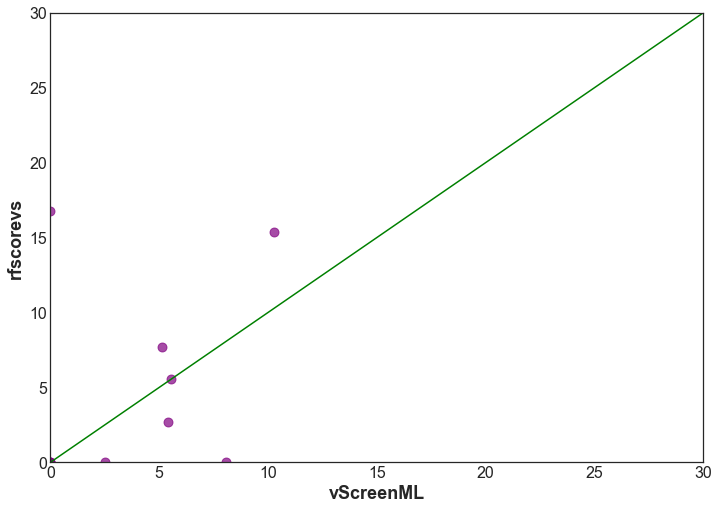

Statistics=9.000, p=0.75315
Same distribution (fail to reject H0)


In [17]:
df_enrich_exlcude_common = enrich_df[enrich_df.index.isin(tags_exclude)]
figureutilities.plot_benchmark_graph_dekois(df_enrich_exlcude_common, 'vScreenML', 'rfscorevs')
figureutilities.wilcoxon_signed(df_enrich_exlcude_common['rfscorevs'], df_enrich_exlcude_common['vScreenML'])

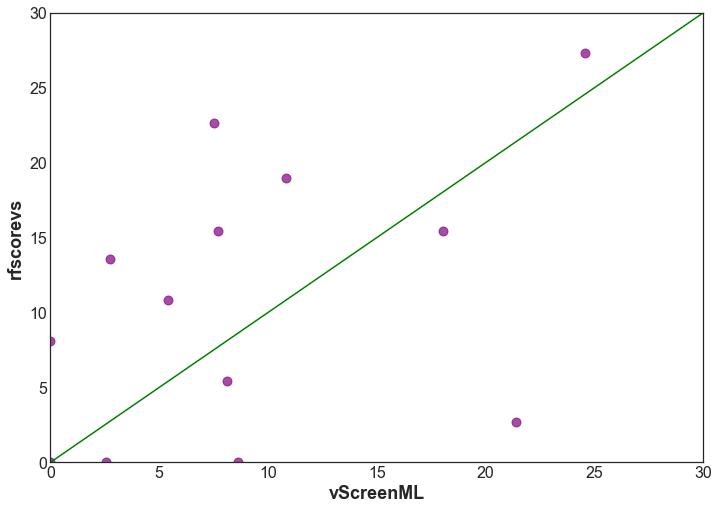

Statistics=27.000, p=0.34652
Same distribution (fail to reject H0)


In [18]:
df_enrich_common = enrich_df[enrich_df.index.isin(tags_overlap)]
figureutilities.plot_benchmark_graph_dekois(df_enrich_common, 'vScreenML', 'rfscorevs')
figureutilities.wilcoxon_signed(df_enrich_common['rfscorevs'], df_enrich_common['vScreenML'])

## PPI Benchmark

In [19]:
#PPI target not present in our training set
ppi_tag = ['1PW6','1R6N','1Y2F','2AZ5','2KP8','3IN7','3O5N','3VKX','3ZRC','4G55']

In [20]:
#Calculate rank of PPI benchmark 
rank_dict ={}
for ifile in ppi_tag:
    compounds_list = pd.read_csv(cfg.PAPER_FIGURE_DIR+'/ppi/'+ifile+'_ppi_full_set_of_all_scoring_function.csv', encoding="utf-8-sig")
    scores = ['RFSCORE_V1_remade', 'nnscore','rfscore_v1','rfscore_v3','rfscore_v2','PLEClinear_p5_l1_s65536','PLECnn_p5_l1_s65536','PLECrf_p5_l1_s65536','vina_affinity','rfscorevs']
    predictors = [x for x in compounds_list.columns if x not in [target, IDcol] and x not in scores]
    _, rank_dict[ifile] = figureutilities.predict_rank_and_enrichment(clf,clf_rf, compounds_list, predictors,predictors_rf, scores )

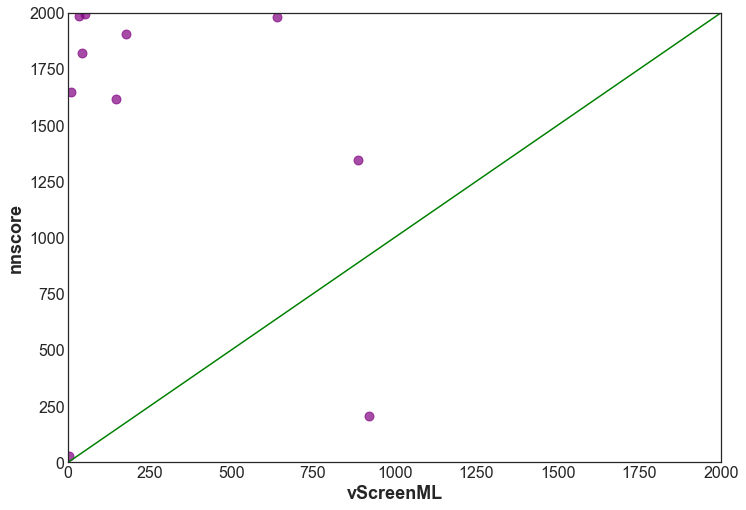

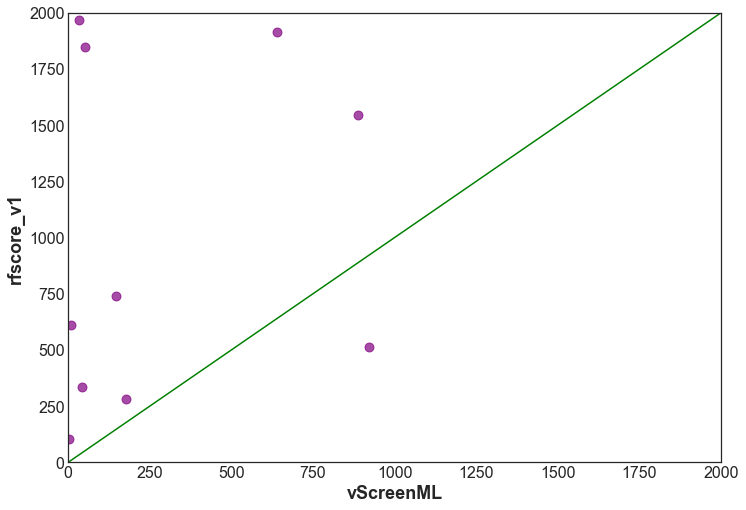

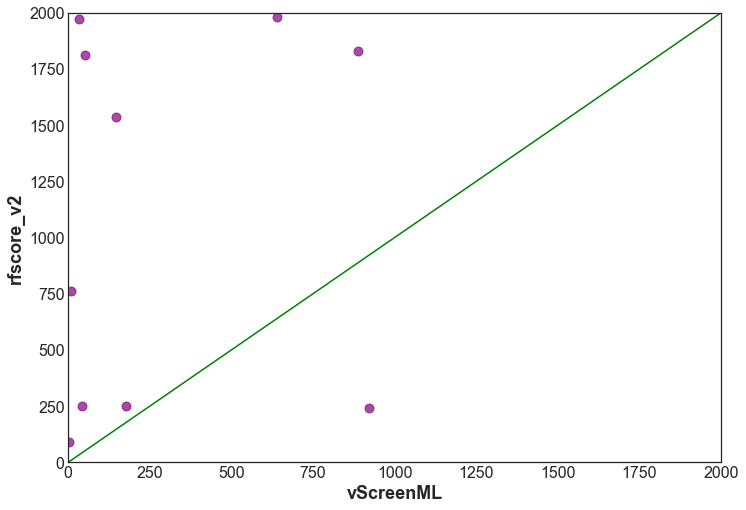

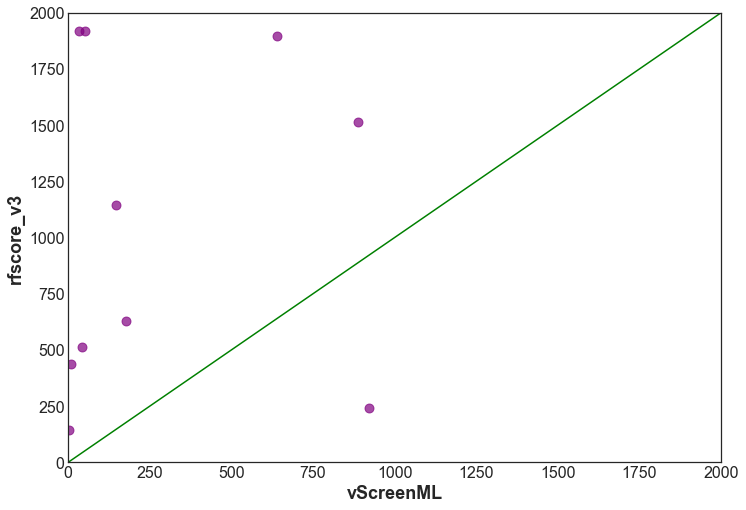

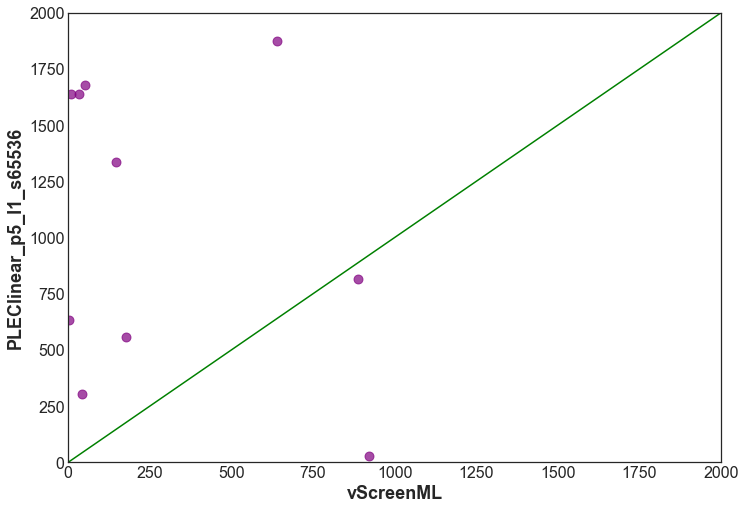

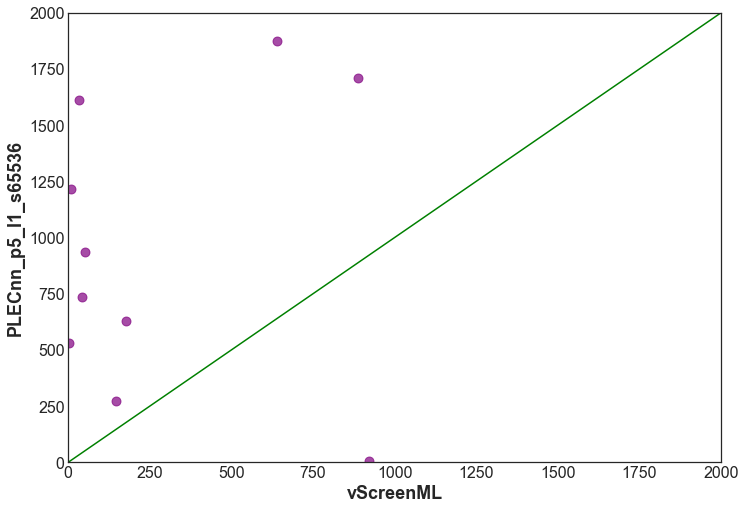

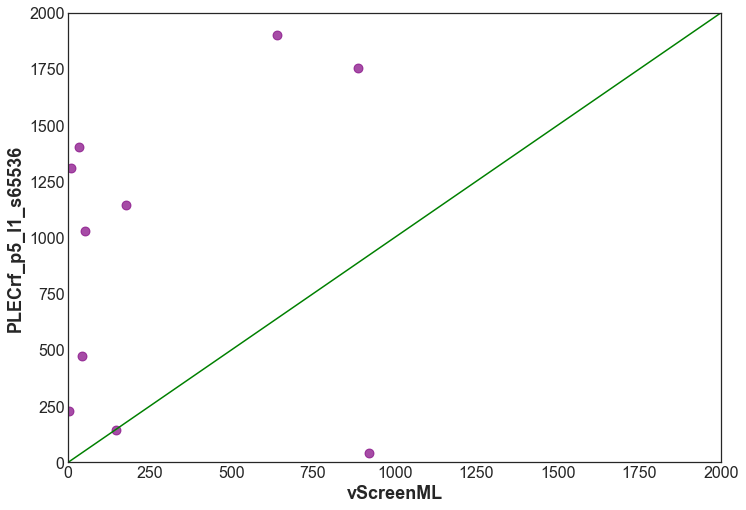

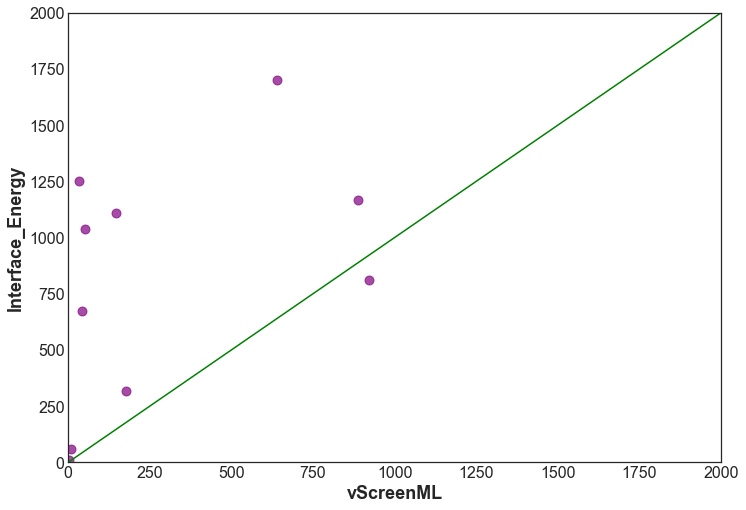

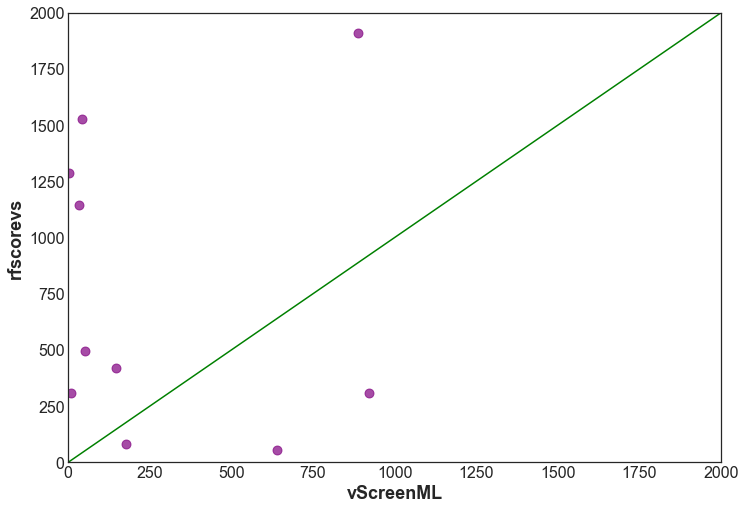

In [21]:
#Plot rank of PPI
rank_df = pd.DataFrame.from_dict(rank_dict,orient='index')
for column in columns:
    figureutilities.plot_benchmark_graph_ppi(rank_df, 'vScreenML',column)

In [22]:
#Wilcoxon signed rank test
columns = [i for i in rank_df.columns if i not in ['Name']]
seen = []
for i in columns:
        if i != 'vScreenML':
            print ('|||||||||||||||Comapring vScreenML and '+ i+ '\t|||||||||||||||||||||||') 
            figureutilities.wilcoxon_signed(np.log(rank_df['vScreenML']), np.log(rank_df[i]))
            print ('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n') 

|||||||||||||||Comapring vScreenML and RFSCORE_V1_remade	|||||||||||||||||||||||
Statistics=13.000, p=0.13941
Same distribution (fail to reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and nnscore	|||||||||||||||||||||||
Statistics=3.000, p=0.01252
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v1	|||||||||||||||||||||||
Statistics=3.000, p=0.01252
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v3	|||||||||||||||||||||||
Statistics=4.000, p=0.01660
Different distribution (reject H0)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

|||||||||||||||Comapring vScreenML and rfscore_v2	|||||||||||||||||||||||
Statistics=4.000, p=0.01660
Different distribution (reject H0)
|||||||||||||||||||||||||||||||||||

In [23]:
#save rank result
rank_df.to_csv(cfg.PAPER_FIGURE_DIR+'/ppi/rank_one_percentwith_rfscorev1.csv')